<a href="https://colab.research.google.com/github/newb-dev-1008/Optimization-Algorithms/blob/master/Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Direct Search Algorithms**


In [ ]:
from math import *

def exhaustive_search(x):
    m = (x**2) + (54/x)
    return m

Please enter your mathematical function:
5*cos(50*x) - 6*sin(37*x)
Enter your start of interval: -3
Enter your end of interval: 3


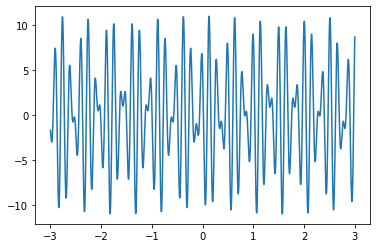

In [14]:
import numexpr as ne
import matplotlib.pyplot as plt
import numpy as np

s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression

a = float(input("Enter the start of interval: "))
b = float(input("Enter the end of interval: "))
x = np.linspace(a, b, 10000)

y = ne.evaluate(s)

plt.plot(x, y)

In [ ]:
# Exhaustive Search Algorithm

In [5]:
import parser
from math import *
import numexpr as ne

s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression

y1 = parser.expr(s).compile()

y = ne.evaluate(s)
print(y)

Please enter your mathematical function:
x**2
[1.]


In [ ]:
x = input("Enter your function: ")
print(x)

#
L=b-a

print(L)
    
x1=merafunction(a)
x2=merafunction(b)

print(x1)
print(x2)